# ĐỒ ÁN MÔN HỌC HỆ HỖ TRỢ QUẢN TRỊ THÔNG MINH (BUSINESS INTELLIGENCE)
- Tên đề tài: Phân tích mối quan hệ giữa hệ số bền vững ESG và hiệu quả tài chính của các công ty trong việc xây dựng chiến lược đầu tư bền vững.
- Bộ dữ liệu: ESG & Financial Performance Dataset

## Bước 1: Khám phá dữ liệu và EDA

### 1.1 Tiến hành import những thư viện cần thiết và nạp dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("company_esg_financial_dataset.csv")


In [2]:
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


- Bộ dữ liệu bao gồm 11000 dòng và 15 cột
- Khám phá sơ bộ nhận thấy rằng đây là bộ dữ liệu theo kiểu chuỗi thời gian (time-series data)
- Theo nội dung từ nguồn gốc của bộ dữ liệu cung cấp, bộ dữ liệu này mô phỏng hiệu suất tài chính và ESG (Môi trường, Xã hội và Quản trị) của 1.000 công ty toàn cầu trong 9 ngành và 7 khu vực từ năm 2015 đến năm 2025. Bộ dữ liệu này bao gồm các số liệu tài chính thực tế (ví dụ: doanh thu, biên lợi nhuận, vốn hóa thị trường) cùng với các chỉ số ESG toàn diện, bao gồm lượng khí thải carbon, mức sử dụng tài nguyên và điểm ESG chi tiết.

### 1.2. Kiểm tra giá trị missing values của dataset và kiểu dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

Bộ dữ liệu bao gồm 3 kiểu dữ liệu chính:
- 2 biến thuộc kiểu int64
- 3 biến thuộc kiểu object
- 11 biến thuộc kiểu float64


In [5]:
df.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

- Nhận thấy rằng ở biến GrowthRate bị thiếu tới 1000 điểm dữ liệu, tuy nhiên 1000/11000 sẽ bằng xấp xỉ 10% số lượng bộ dữ liệu

=> Vì vậy so với tổng thể khối lượng bộ dữ liệu thì đây không phải là một con số quá lớn, từ đó ta có thể tiến hành xử lý các giá trị missing values thông qua việc tự động điền giá trị mean (trung bình) hoặc median (trung vị)

Nhóm quyết định xử lý bằng cách sử dụng phương pháp điền trung vị (median)

In [6]:
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].median())
print(df['GrowthRate'].isna().sum())


0


Như vậy, toàn bộ giá trị thiếu của biến GrowthRate đã được xử lý

### 1.3. Explanatory Data Analysis (EDA)

#### 1.3.1. Phân tích đơn biến

In [7]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.836700,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,8.986164,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-0.600000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,10.300000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


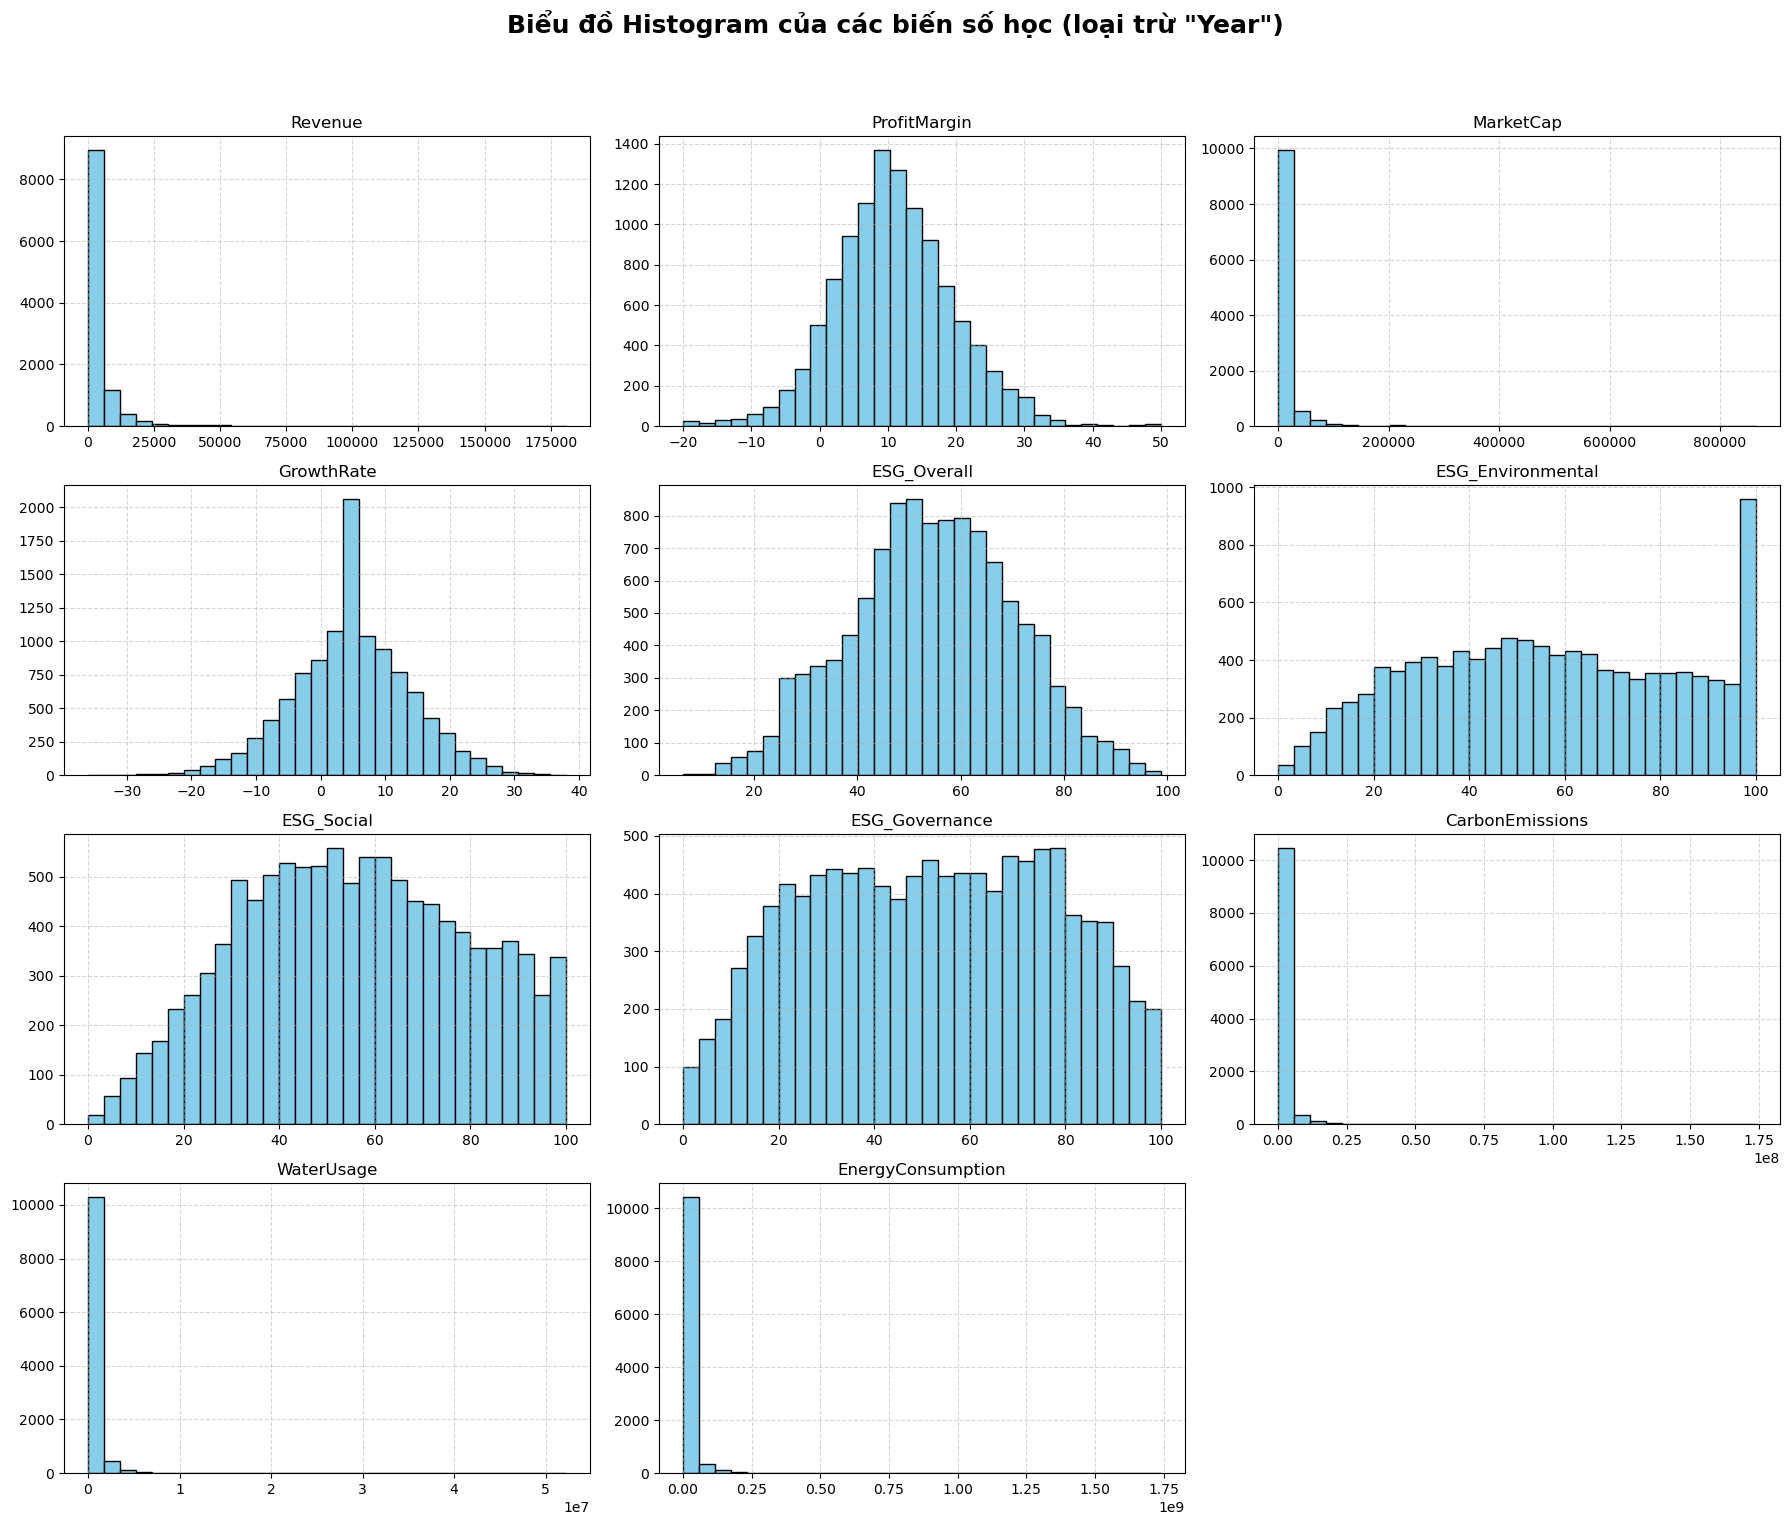

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Lọc các biến số học và loại bỏ 'Year'
numeric_cols = df.select_dtypes(include='number').drop(columns=['Year', 'CompanyID'], errors='ignore')

# Khởi tạo grid layout
n_cols = 3  # số cột biểu đồ trên mỗi hàng
n_rows = int(np.ceil(len(numeric_cols.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Chuyển 2D -> 1D để dễ duyệt

# Vẽ từng histogram
for i, col in enumerate(numeric_cols.columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Ẩn các ô trống nếu số biến < số subplot
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Thêm tiêu đề chính
fig.suptitle('Biểu đồ Histogram của các biến số học (loại trừ "Year")', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


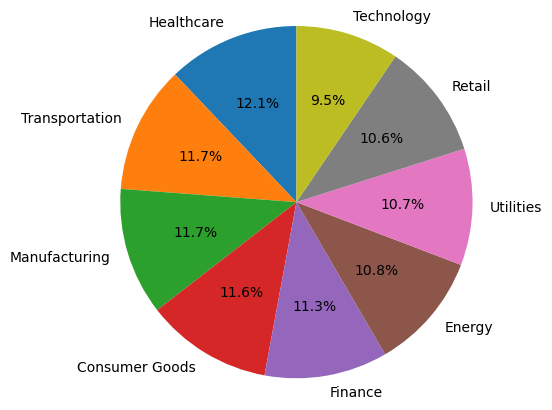

In [9]:
# Đếm số lượng các loại 'fuel-type' trong DataFrame df
fuel_type_counts = df['Industry'].value_counts()

# Lấy tên các loại nhiên liệu (fuel-type) làm nhãn
labels = fuel_type_counts.index

# Lấy số lượng của mỗi loại nhiên liệu
sizes = fuel_type_counts.values

# Vẽ biểu đồ tròn
plt.figure(figsize=(5, 5))  # Kích thước biểu đồ
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Đảm bảo rằng biểu đồ tròn là hình tròn
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\245753863.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region', order=region_counts.index, palette='Set2')


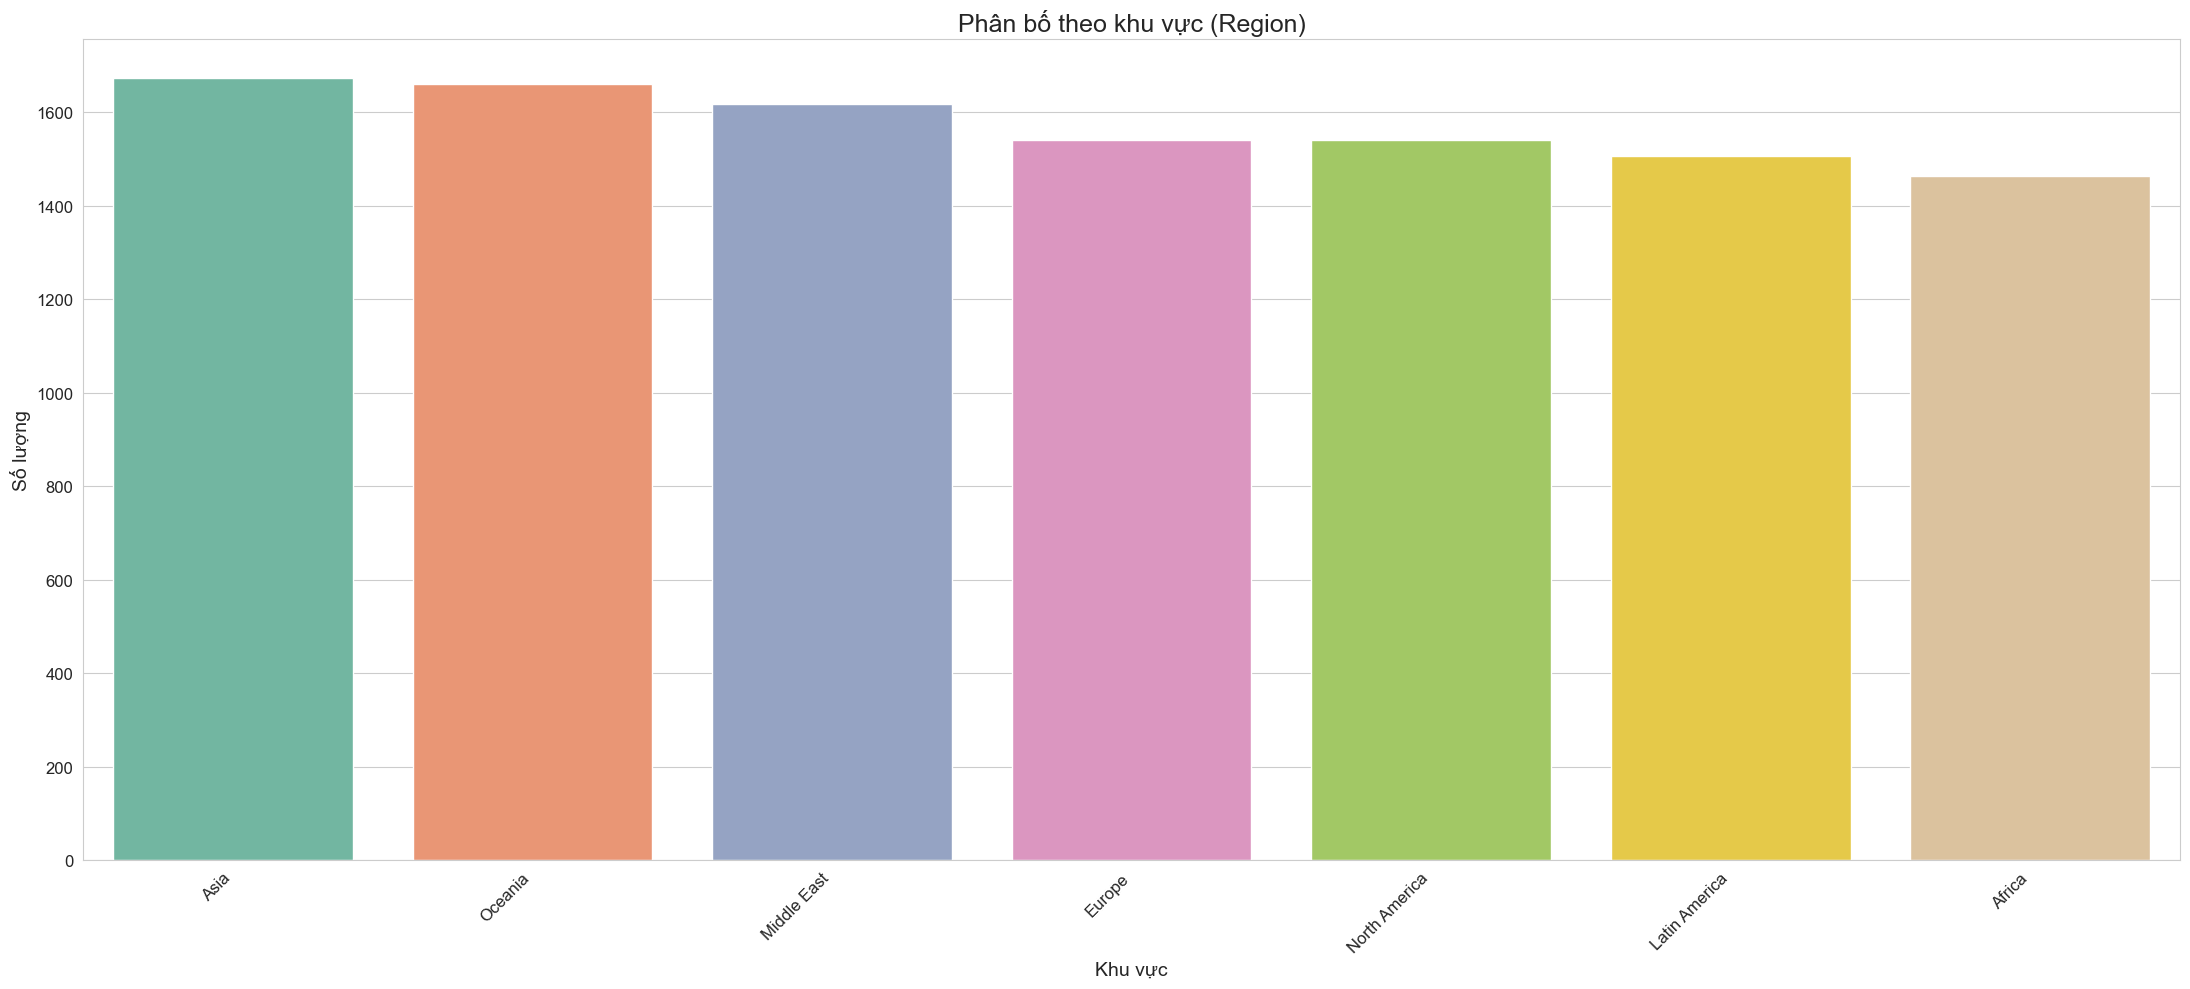

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 10))
sns.set_style("whitegrid")
region_counts = df['Region'].value_counts()
sns.countplot(data=df, x='Region', order=region_counts.index, palette='Set2')
plt.title("Phân bố theo khu vực (Region)", fontsize=18)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Số lượng", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


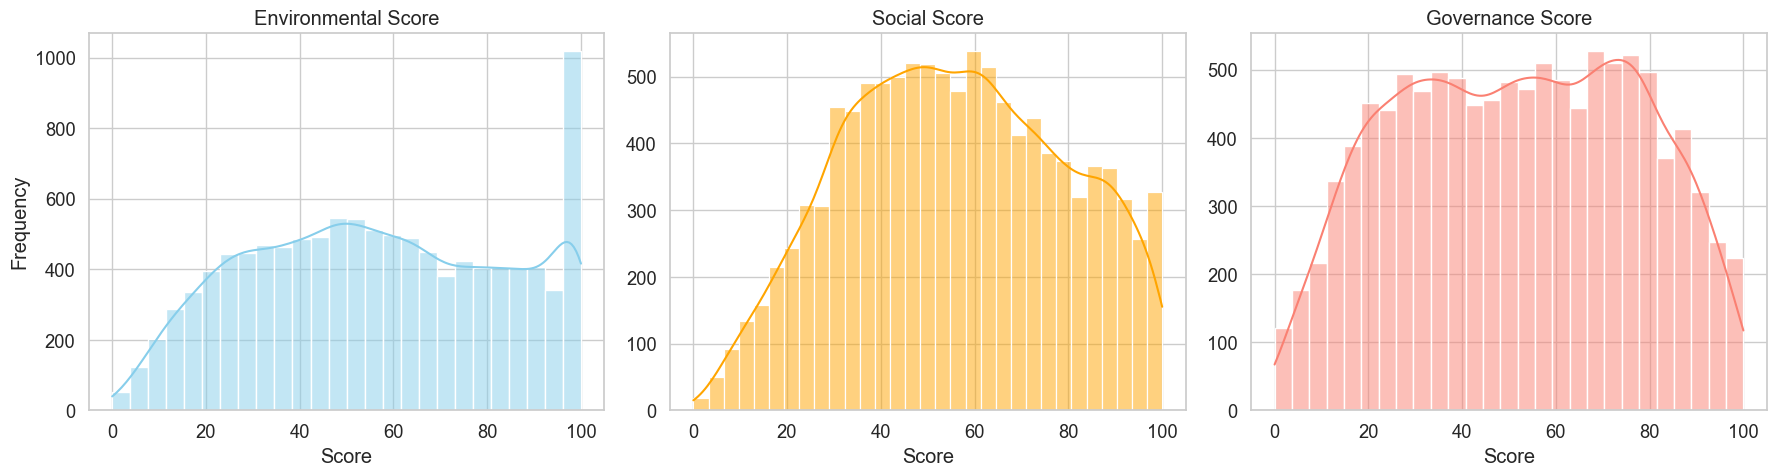

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt kiểu hiển thị đẹp
sns.set(style='whitegrid', palette='pastel', font_scale=1.2)

# Tạo figure với 1 hàng, 3 cột
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ESG Environmental
sns.histplot(df['ESG_Environmental'], kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Environmental Score')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')

# ESG Social
sns.histplot(df['ESG_Social'], kde=True, color='orange', ax=axs[1])
axs[1].set_title('Social Score')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('')

# ESG Governance
sns.histplot(df['ESG_Governance'], kde=True, color='salmon', ax=axs[2])
axs[2].set_title('Governance Score')
axs[2].set_xlabel('Score')
axs[2].set_ylabel('')

# Căn chỉnh layout
plt.tight_layout()
plt.show()


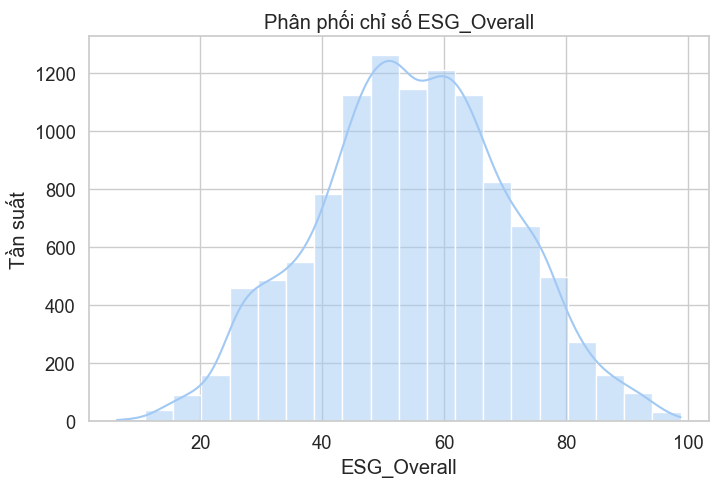

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['ESG_Overall'], kde=True, bins=20)
plt.title("Phân phối chỉ số ESG_Overall")
plt.xlabel("ESG_Overall")
plt.ylabel("Tần suất")
plt.show()


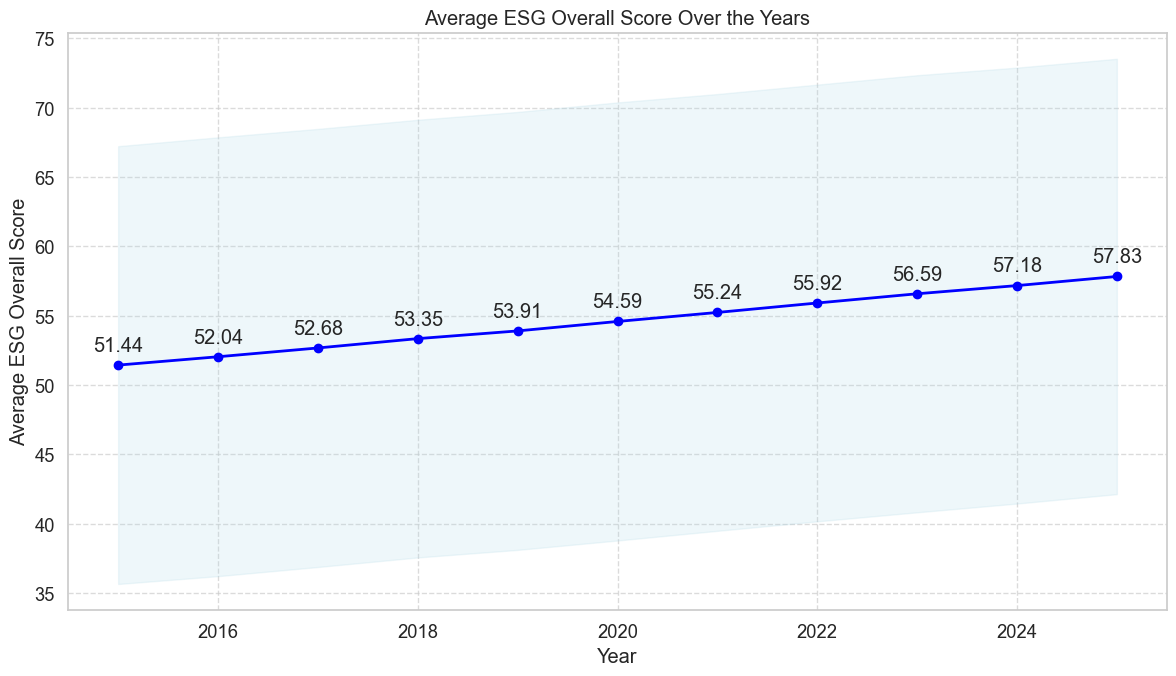

In [13]:
plt.figure(figsize=(12, 7))

avg_esg_by_year = df.groupby('Year')['ESG_Overall'].mean()
std_esg_by_year = df.groupby('Year')['ESG_Overall'].std()

plt.plot(avg_esg_by_year.index, avg_esg_by_year.values, 
         marker='o', 
         linestyle='-', 
         linewidth=2, 
         color='blue')

plt.fill_between(avg_esg_by_year.index, 
                 avg_esg_by_year.values - std_esg_by_year.values,
                 avg_esg_by_year.values + std_esg_by_year.values, 
                 alpha=0.2, 
                 color='lightblue')

plt.title('Average ESG Overall Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average ESG Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)

for year, avg_score in avg_esg_by_year.items():
    plt.annotate(f'{avg_score:.2f}', 
                 (year, avg_score), 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center')

plt.tight_layout()
plt.show()

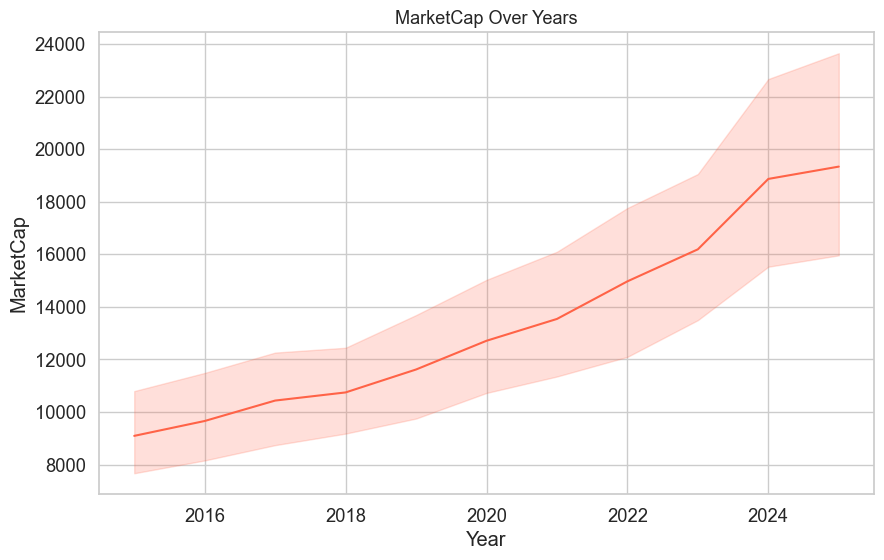

In [14]:
plt.figure(figsize=(10,6))
plt.title('MarketCap Over Years', fontsize=13)
sns.lineplot(x=df['Year'], y=df['MarketCap'], color='tomato')
plt.show()

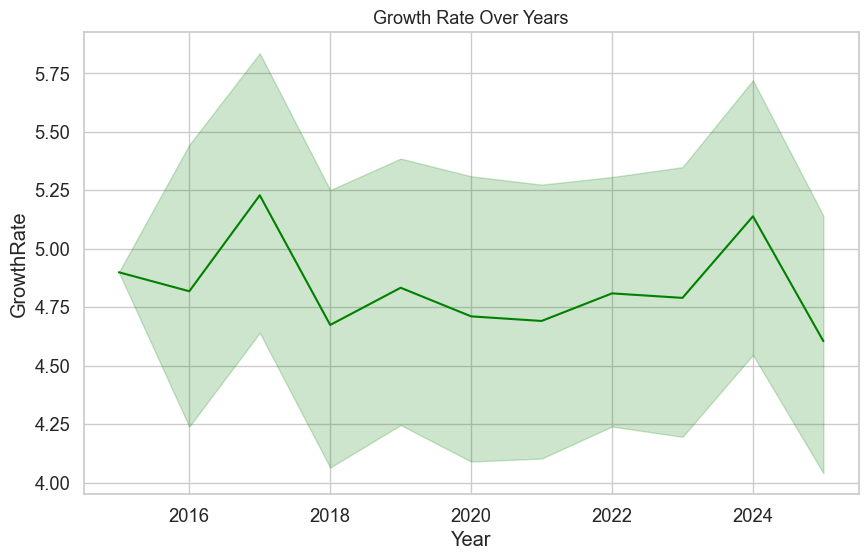

In [15]:
plt.figure(figsize=(10,6))
plt.title('Growth Rate Over Years', fontsize=13)
sns.lineplot(x=df['Year'], y=df['GrowthRate'], color='green')
plt.show()

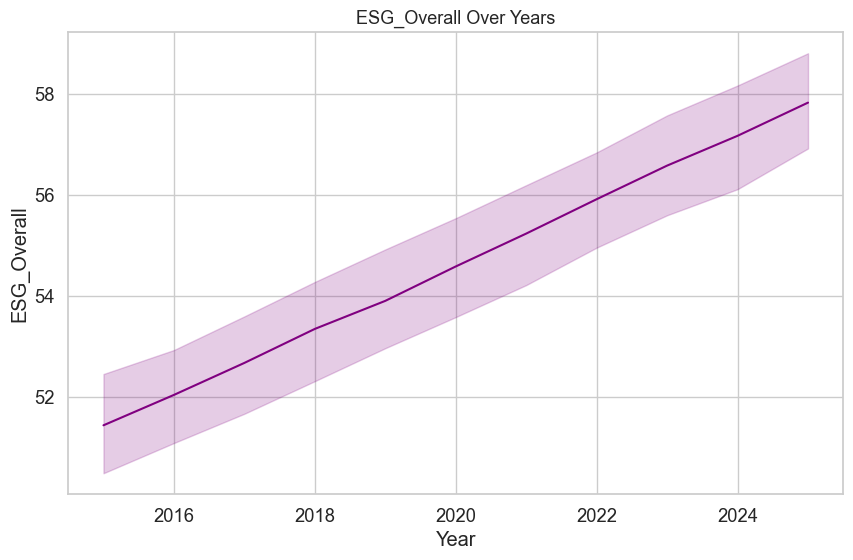

In [16]:
plt.figure(figsize=(10,6))
plt.title('ESG_Overall Over Years', fontsize=13)
sns.lineplot(x=df['Year'], y=df['ESG_Overall'], color='purple')
plt.show()

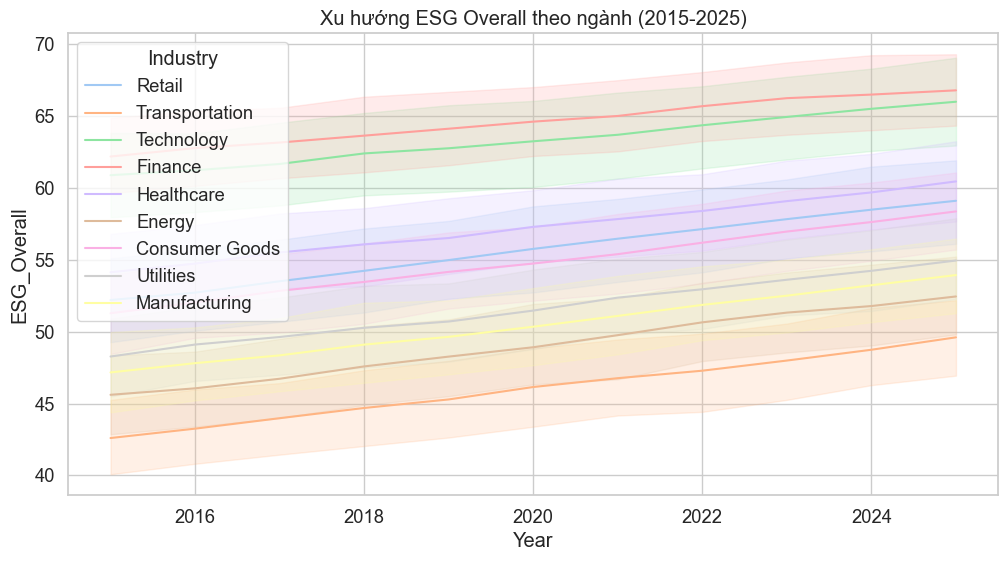

In [17]:
# Xu hướng ESG theo năm
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="ESG_Overall", hue="Industry")
plt.title("Xu hướng ESG Overall theo ngành (2015-2025)")
plt.show()

#### 1.3.2. Phân tích đa biến

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\3315391983.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('tab20')


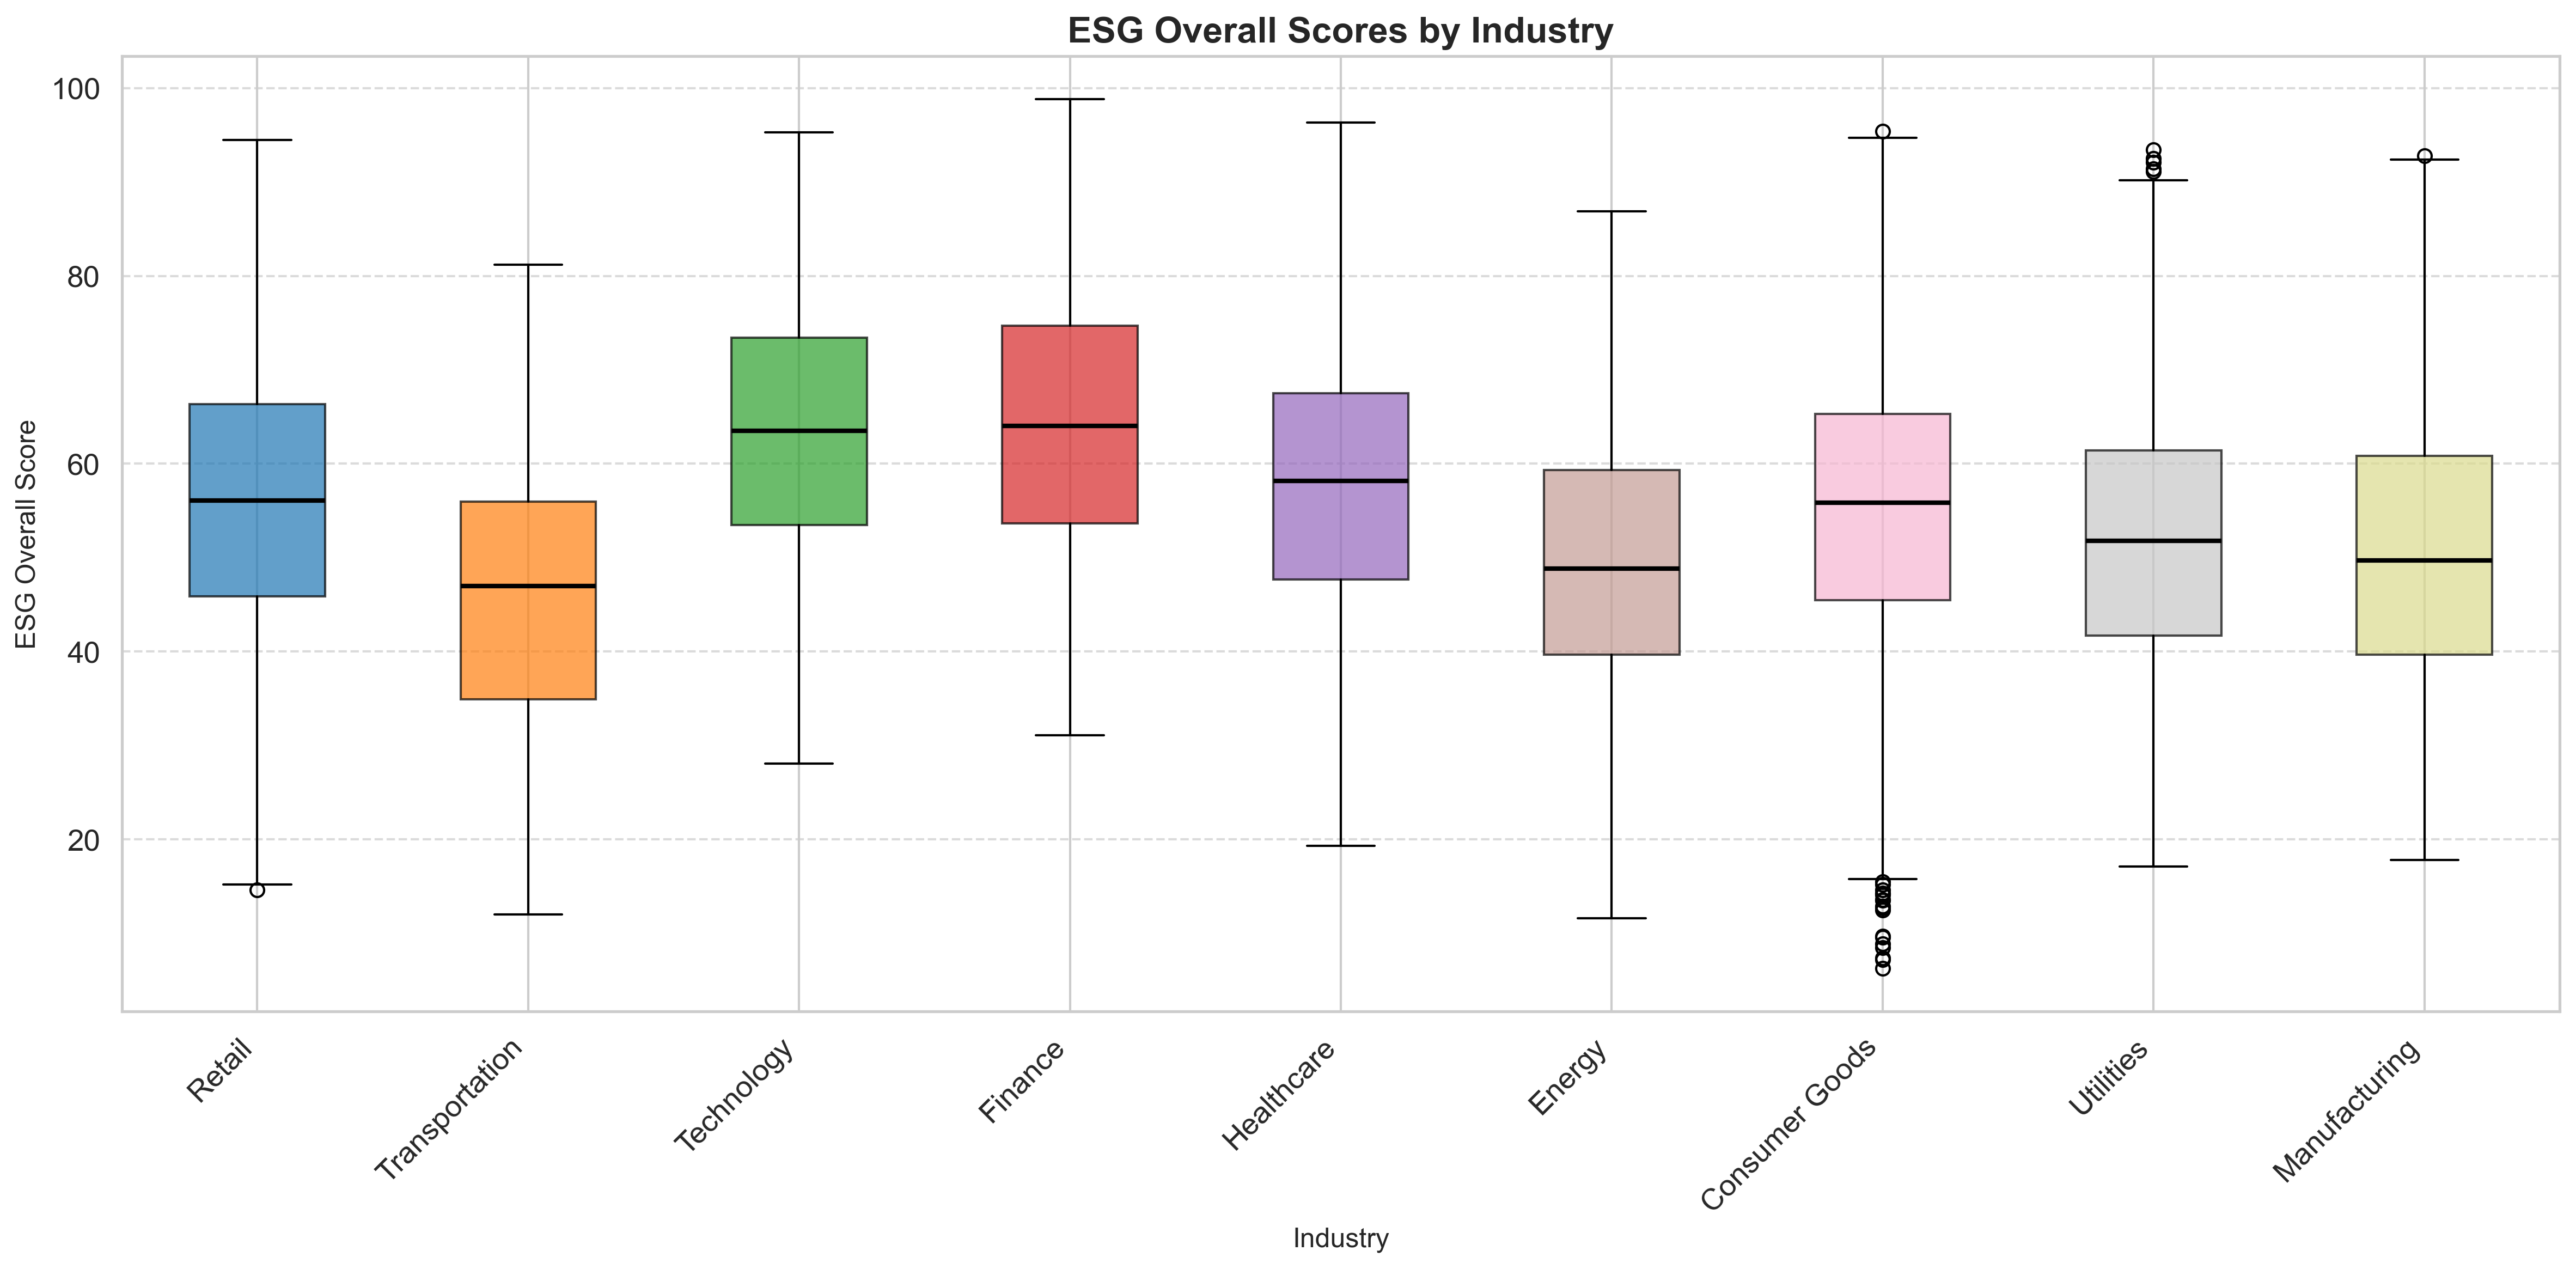

In [18]:
plt.figure(figsize=(16, 8), dpi=300)

industries = df['Industry'].dropna().unique()
data_to_plot = [df[df['Industry'] == industry]['ESG_Overall'].dropna() for industry in industries]

palette = plt.cm.get_cmap('tab20')
colors = [palette(i/len(industries)) for i in range(len(industries))]

bp = plt.boxplot(data_to_plot, 
                 labels=industries, 
                 patch_artist=True,
                 medianprops={'color': 'black', 'linewidth': 2})

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('ESG Overall Scores by Industry', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('ESG Overall Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\1082673598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Industry', y='Revenue', inner='box', palette='Pastel1')


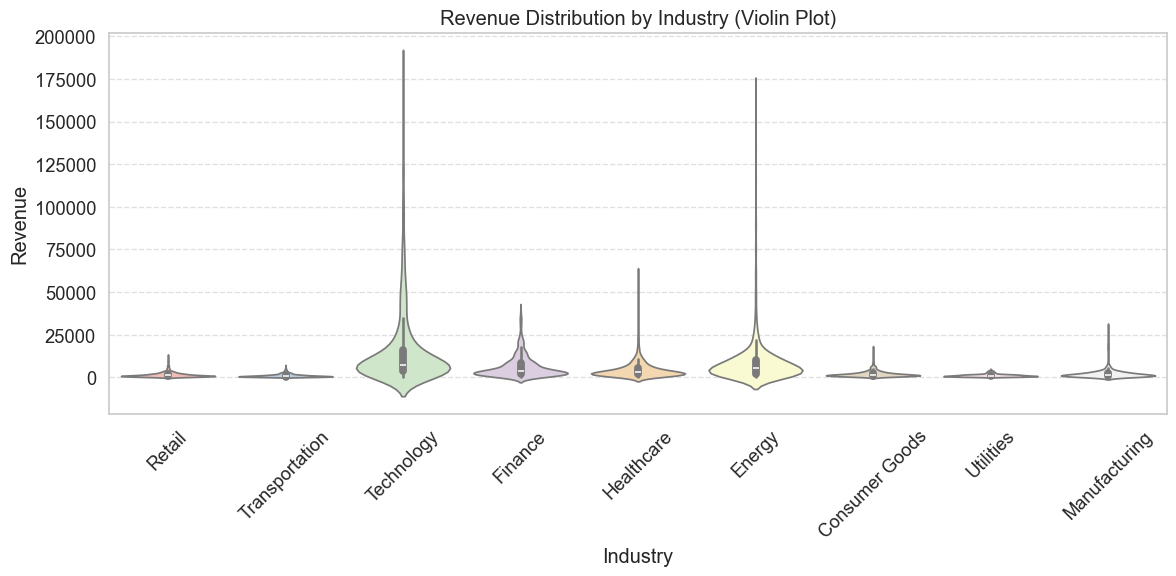

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Industry', y='Revenue', inner='box', palette='Pastel1')
plt.title('Revenue Distribution by Industry (Violin Plot)')
plt.xlabel('Industry')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\3710118843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Region', y='Revenue', inner='box', palette='Pastel1')


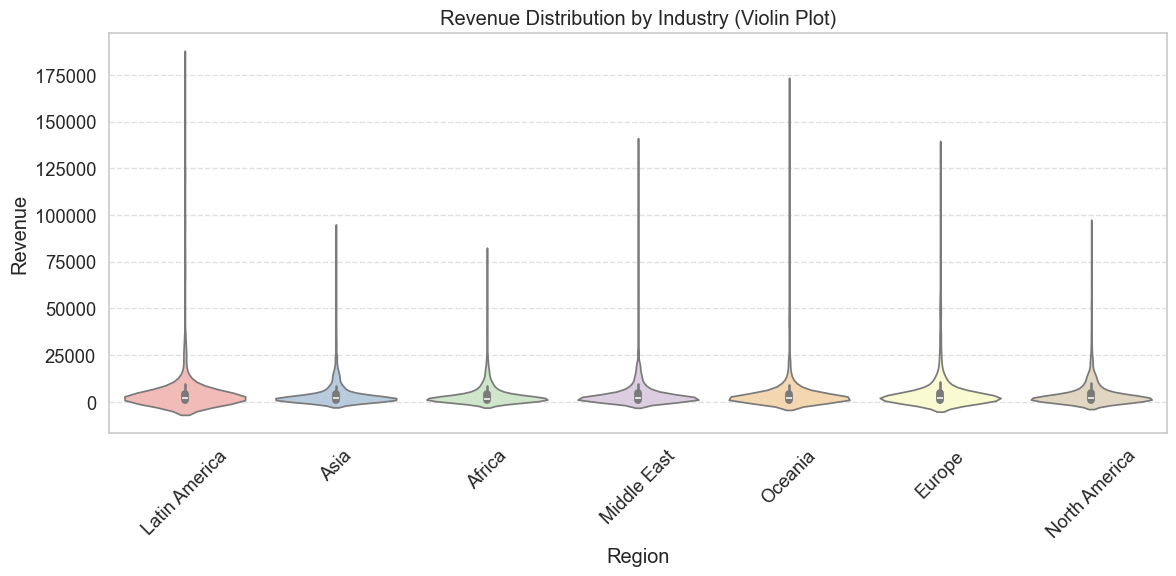

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Region', y='Revenue', inner='box', palette='Pastel1')
plt.title('Revenue Distribution by Industry (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


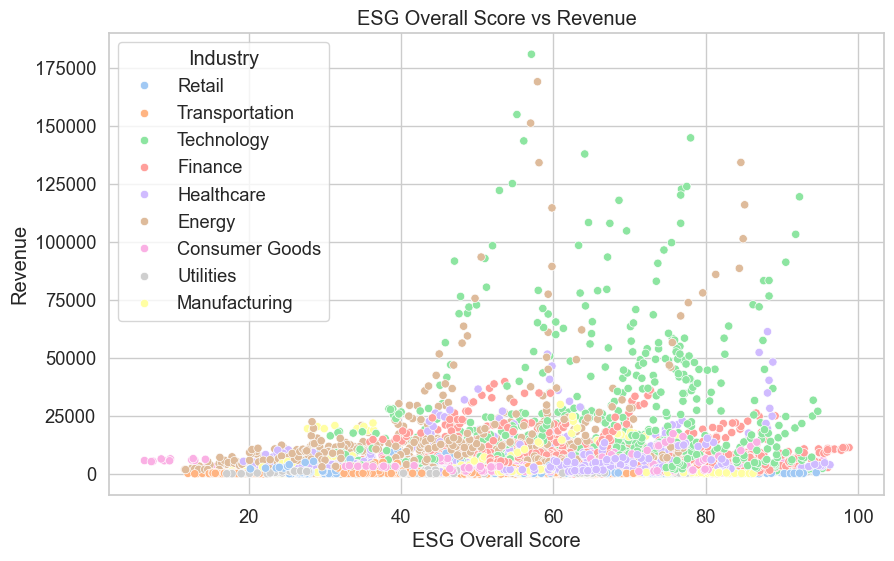

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ESG_Overall'], y=df['Revenue'], hue=df['Industry'])
plt.title('ESG Overall Score vs Revenue')
plt.xlabel('ESG Overall Score')
plt.ylabel('Revenue')
plt.show()

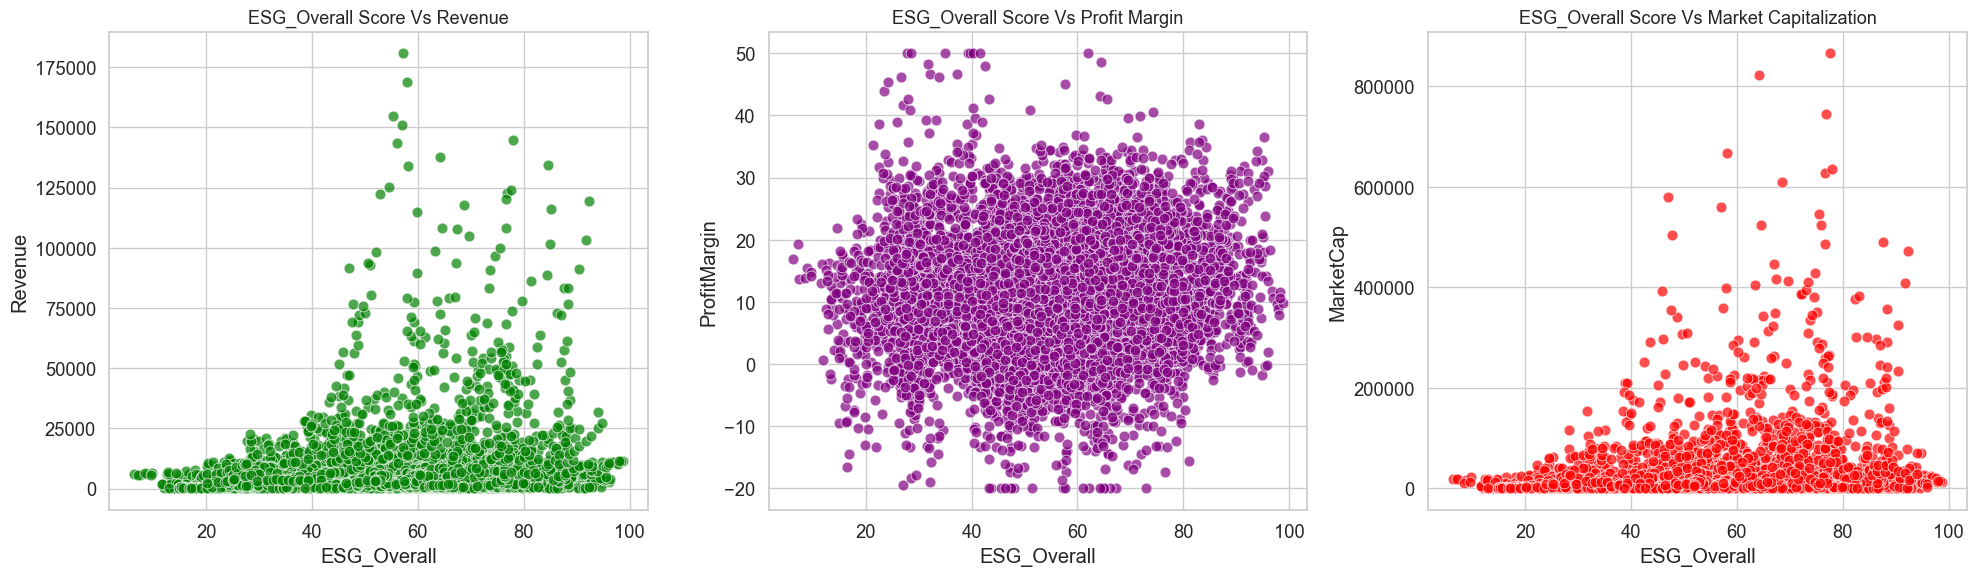

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure với 3 trục con (subplot)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 1 hàng, 3 cột

# Biểu đồ 1: ESG vs Revenue
axs[0].set_title('ESG_Overall Score Vs Revenue', fontsize=13)
sns.scatterplot(x=df['ESG_Overall'], y=df['Revenue'], color='green', alpha=0.7, s=60, ax=axs[0])

# Biểu đồ 2: ESG vs Profit Margin
axs[1].set_title('ESG_Overall Score Vs Profit Margin', fontsize=13)
sns.scatterplot(x=df['ESG_Overall'], y=df['ProfitMargin'], color='purple', alpha=0.7, s=60, ax=axs[1])

# Biểu đồ 3: ESG vs Market Capitalization
axs[2].set_title('ESG_Overall Score Vs Market Capitalization', fontsize=13)
sns.scatterplot(x=df['ESG_Overall'], y=df['MarketCap'], color='red', alpha=0.7, s=60, ax=axs[2])

# Tự động điều chỉnh layout
plt.tight_layout()
plt.show()


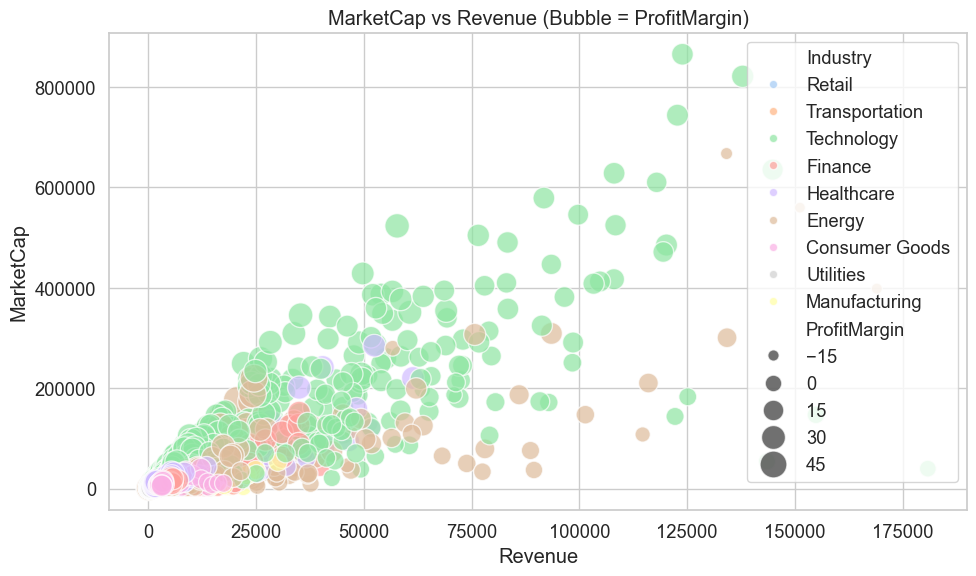

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenue', y='MarketCap', hue='Industry',
                size='ProfitMargin', sizes=(40, 400), alpha=0.7)
plt.title('MarketCap vs Revenue (Bubble = ProfitMargin)')
plt.tight_layout()
plt.show()

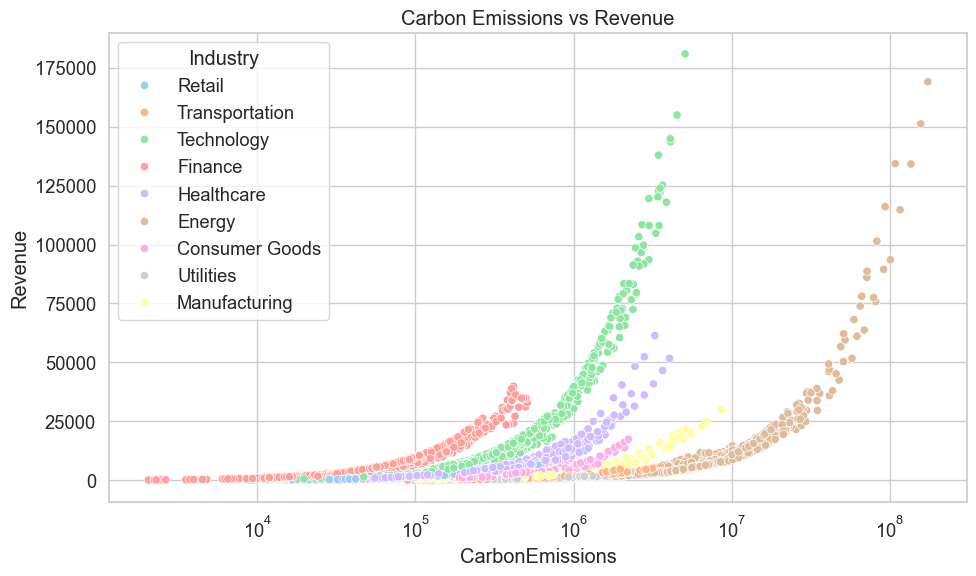

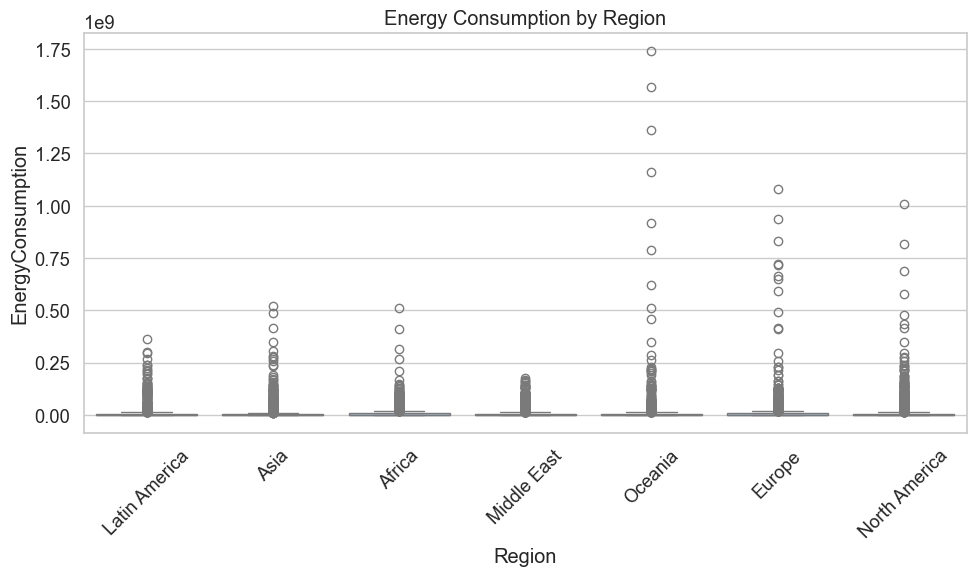

In [24]:
# Carbon Emissions vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CarbonEmissions', y='Revenue', hue='Industry')
plt.title('Carbon Emissions vs Revenue')
plt.xscale('log')  # If needed due to skew
plt.tight_layout()
plt.show()

# Energy Consumption by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='EnergyConsumption')
plt.title('Energy Consumption by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

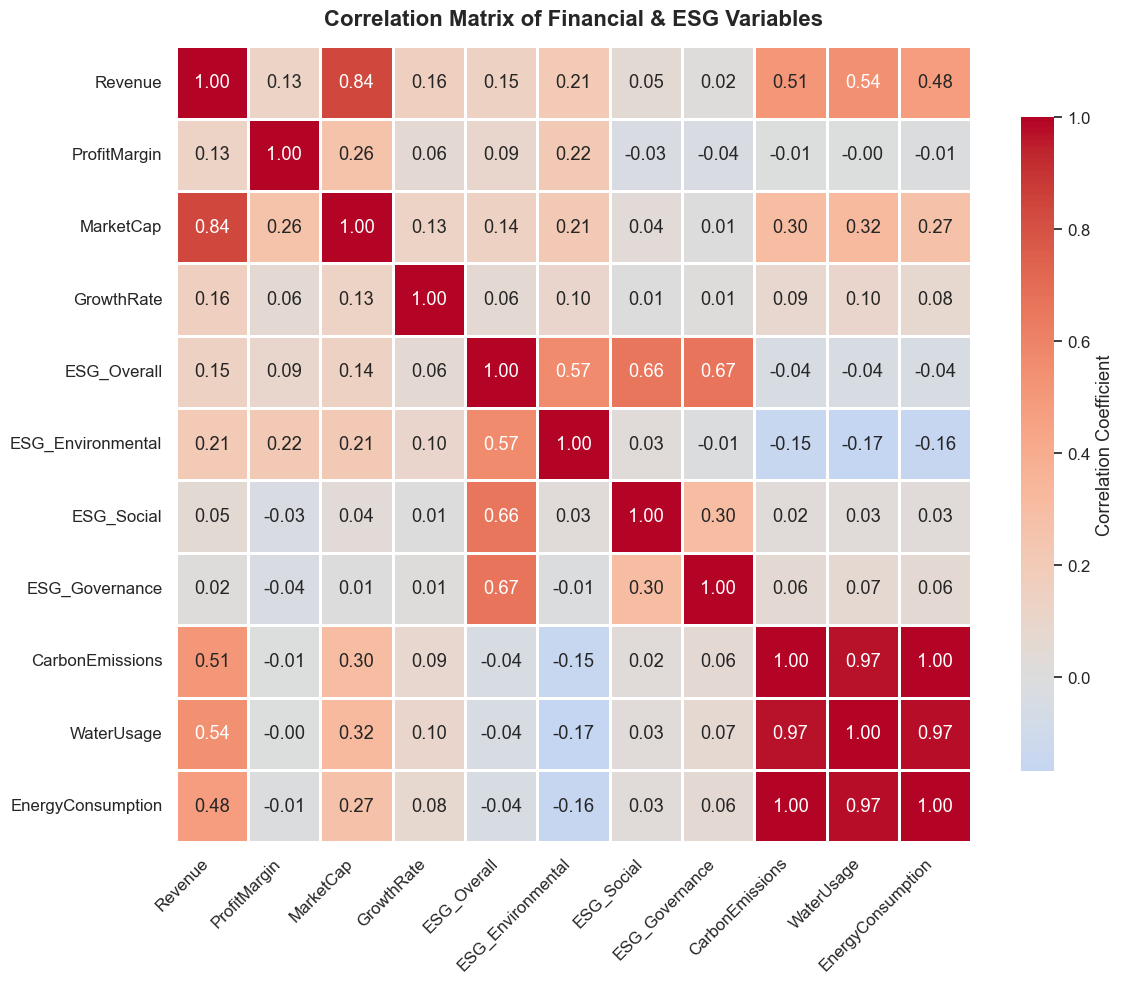

In [25]:
# Tính ma trận tương quan
correlation_matrix = df[['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 
                         'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 
                         'WaterUsage', 'EnergyConsumption']].corr()

# Thiết lập biểu đồ
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)  # tăng kích thước chữ

# Vẽ heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

# Tiêu đề đẹp
plt.title('Correlation Matrix of Financial & ESG Variables', fontsize=16, pad=15, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Tính ma trận tương quan chỉ giữa các biến thành phần với biến target 'price'
corr_with_target = numeric_df.corr()['ESG_Overall']

# Chuyển đổi Series thành DataFrame và thiết lập tên cột
corr_df = corr_with_target.reset_index()
corr_df.columns = ['Biến', 'Hệ số tương quan']

# Loại bỏ hàng chứa biến target
corr_df = corr_df[corr_df['Biến'] != 'ESG_Overall']

# Sắp xếp theo hệ số tương quan, từ cao đến thấp
sorted_corr_df = corr_df.sort_values(by='Hệ số tương quan', ascending=False)

# Lấy ra những cặp có tương quan cao nhất và thấp nhất
highest_corr = sorted_corr_df.head(10)  # 10 cặp có hệ số tương quan cao nhất
# In kết quả
print("Cặp biến có hệ số tương quan cao nhất:")
print(highest_corr)


Cặp biến có hệ số tương quan cao nhất:
                 Biến  Hệ số tương quan
9      ESG_Governance          0.671476
8          ESG_Social          0.662357
7   ESG_Environmental          0.568171
2             Revenue          0.148869
4           MarketCap          0.143793
1                Year          0.127865
3        ProfitMargin          0.088006
5          GrowthRate          0.064806
0           CompanyID          0.023162
10    CarbonEmissions         -0.039672


In [27]:
corr_matrix = numeric_df.corr()

# Đặt đường chéo (tương quan chính nó) thành NaN
np.fill_diagonal(corr_matrix.values, np.nan)

# Lấy phần tam giác trên (không tính lặp)
upper_triangle_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Chuyển thành Series và sắp xếp
sorted_corr = upper_triangle_corr.unstack().sort_values(ascending=False)

# Tạo DataFrame mới từ các cặp biến có tương quan mạnh
high_corr_df = pd.DataFrame(sorted_corr).reset_index()
high_corr_df.columns = ['Biến 1', 'Biến 2', 'Hệ số tương quan']

# Loại bỏ các giá trị NaN và lọc các hệ số tương quan mạnh
high_corr_df = high_corr_df.dropna()
high_corr_df = high_corr_df[
    (high_corr_df['Hệ số tương quan'] >= 0.5) | 
    (high_corr_df['Hệ số tương quan'] <= -0.1)
]

# In kết quả
print(high_corr_df)

               Biến 1             Biến 2  Hệ số tương quan
0   EnergyConsumption    CarbonEmissions          0.997210
1   EnergyConsumption         WaterUsage          0.974503
2          WaterUsage    CarbonEmissions          0.968974
3           MarketCap            Revenue          0.836884
4      ESG_Governance        ESG_Overall          0.671476
5          ESG_Social        ESG_Overall          0.662357
6   ESG_Environmental        ESG_Overall          0.568171
7          WaterUsage            Revenue          0.540424
8     CarbonEmissions            Revenue          0.507967
75    CarbonEmissions  ESG_Environmental         -0.151823
76  EnergyConsumption  ESG_Environmental         -0.158019
77         WaterUsage  ESG_Environmental         -0.167818


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
df_MC = df.copy()

In [30]:
df_MC.drop(columns=['CompanyName'], axis=1, inplace=True)
df_MC.drop(columns=['CompanyID'], axis=1, inplace=True)

In [31]:
# 🔧 Mã hóa nhãn
encode = LabelEncoder()
df_MC['Industry'] = encode.fit_transform(df_MC['Industry'])
df_MC['Region'] = encode.fit_transform(df_MC['Region'])

# 🎯 Tách dữ liệu
X = df_MC.drop(columns='MarketCap')
y = df_MC['MarketCap']

In [32]:
# ⚙️ Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Adaboost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results = []

# 🚀 Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    r2 = r2_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)

    print(f"\n✅ Model: {name}")
    print(f"🚀 R2 Score: {r2:.4f}")
    print(f"🧠 MSE: {mse:.2f}")

    results.append({'Model': name, 'R2': r2, 'MSE': mse})


✅ Model: Linear Regression
🚀 R2 Score: 0.8153
🧠 MSE: 402260604.74

✅ Model: Ridge Regression
🚀 R2 Score: 0.8155
🧠 MSE: 401813133.72

✅ Model: Lasso Regression
🚀 R2 Score: 0.8155
🧠 MSE: 401828659.76


c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.705e+10, tolerance: 1.274e+09
  model = cd_fast.enet_coordinate_descent(



✅ Model: Bagging Regressor
🚀 R2 Score: 0.7796
🧠 MSE: 479968232.66

✅ Model: Random Forest Regressor
🚀 R2 Score: 0.8204
🧠 MSE: 391005125.54

✅ Model: Adaboost Regressor
🚀 R2 Score: 0.6795
🧠 MSE: 697948009.00

✅ Model: Decision Tree Regressor
🚀 R2 Score: 0.7730
🧠 MSE: 494307120.63

✅ Model: KNN
🚀 R2 Score: 0.8207
🧠 MSE: 390485004.53

✅ Model: Gradient Boosting Regressor
🚀 R2 Score: 0.8580
🧠 MSE: 309121376.39



📋 Tổng hợp kết quả:
                         Model        R2           MSE
8  Gradient Boosting Regressor  0.858045  3.091214e+08
7                          KNN  0.820681  3.904850e+08
4      Random Forest Regressor  0.820442  3.910051e+08
1             Ridge Regression  0.815479  4.018131e+08
2             Lasso Regression  0.815472  4.018287e+08
0            Linear Regression  0.815273  4.022606e+08
3            Bagging Regressor  0.779588  4.799682e+08
6      Decision Tree Regressor  0.773003  4.943071e+08
5           Adaboost Regressor  0.679487  6.979480e+08


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\4021067150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R2', y='Model', palette='viridis')


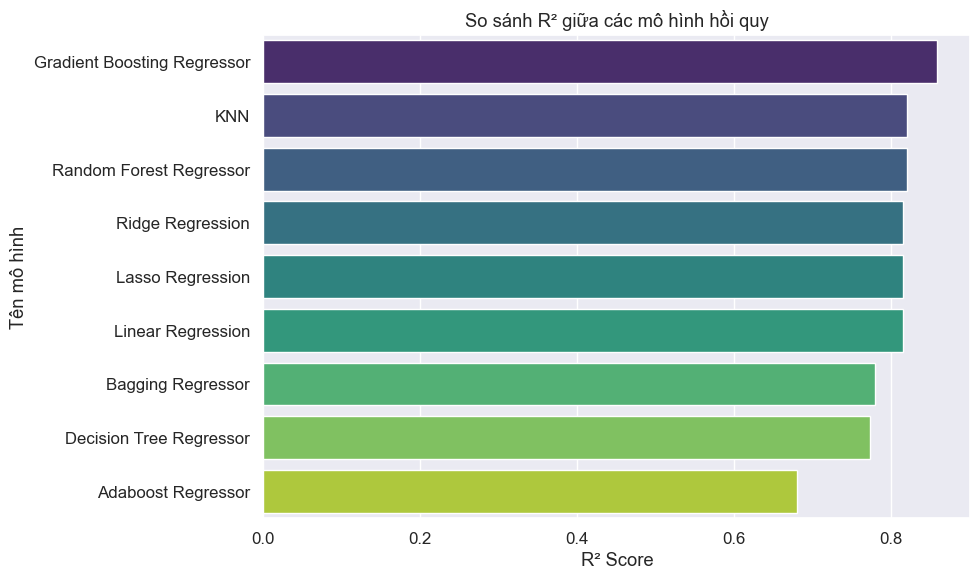

In [34]:
# 📊 Bảng tổng hợp kết quả
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\n📋 Tổng hợp kết quả:")
print(results_df)

# 📊 Vẽ biểu đồ so sánh R² các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='R2', y='Model', palette='viridis')
plt.title('So sánh R² giữa các mô hình hồi quy')
plt.xlabel('R² Score')
plt.ylabel('Tên mô hình')
plt.tight_layout()
plt.show()

In [35]:
df_ESG = df.copy()

In [36]:
df_ESG.drop(columns=['CompanyName'], axis=1, inplace=True)
df_ESG.drop(columns=['CompanyID'], axis=1, inplace=True)

In [37]:
encode = LabelEncoder()
df_ESG['Industry'] = encode.fit_transform(df_ESG['Industry'])
df_ESG['Region'] = encode.fit_transform(df_ESG['Region'])

In [38]:
X_1 = df_ESG.drop(columns=['ESG_Overall'])
y_1 = df_ESG['ESG_Overall']

In [39]:
# ⚙️ Chuẩn hóa đặc trưng
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X_1)

# 📊 Chia train/test
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_scaled1, y_1, test_size=0.2, random_state=42
)


In [40]:
models1 = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Adaboost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results1 = []

# 🚀 Train & Evaluate
for name_1, model_1 in models1.items():
    model_1.fit(X_train1, y_train1)
    y_preds1 = model_1.predict(X_test1)

    r2_1 = r2_score(y_test1, y_preds1)
    mse_1 = mean_squared_error(y_test1, y_preds1)

    print(f"\n✅ Model: {name_1}")
    print(f"🚀 R2 Score: {r2_1:.4f}")
    print(f"🧠 MSE: {mse_1:.2f}")

    results1.append({'Model': name_1, 'R2': r2_1, 'MSE': mse_1})


✅ Model: Linear Regression
🚀 R2 Score: 1.0000
🧠 MSE: 0.00

✅ Model: Ridge Regression
🚀 R2 Score: 1.0000
🧠 MSE: 0.00

✅ Model: Lasso Regression
🚀 R2 Score: 0.9903
🧠 MSE: 2.29

✅ Model: Bagging Regressor
🚀 R2 Score: 0.9958
🧠 MSE: 0.98

✅ Model: Random Forest Regressor
🚀 R2 Score: 0.9973
🧠 MSE: 0.64

✅ Model: Adaboost Regressor
🚀 R2 Score: 0.9454
🧠 MSE: 12.90

✅ Model: Decision Tree Regressor
🚀 R2 Score: 0.9886
🧠 MSE: 2.70

✅ Model: KNN
🚀 R2 Score: 0.9608
🧠 MSE: 9.25

✅ Model: Gradient Boosting Regressor
🚀 R2 Score: 0.9958
🧠 MSE: 1.00



📋 Tổng hợp kết quả:
                         Model        R2        MSE
0            Linear Regression  0.999995   0.001105
1             Ridge Regression  0.999995   0.001112
4      Random Forest Regressor  0.997287   0.640446
3            Bagging Regressor  0.995834   0.983378
8  Gradient Boosting Regressor  0.995769   0.998662
2             Lasso Regression  0.990302   2.289097
6      Decision Tree Regressor  0.988578   2.695968
7                          KNN  0.960803   9.252001
5           Adaboost Regressor  0.945361  12.896897


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13068\163354640.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results1_df, x='R2', y='Model', palette='viridis')


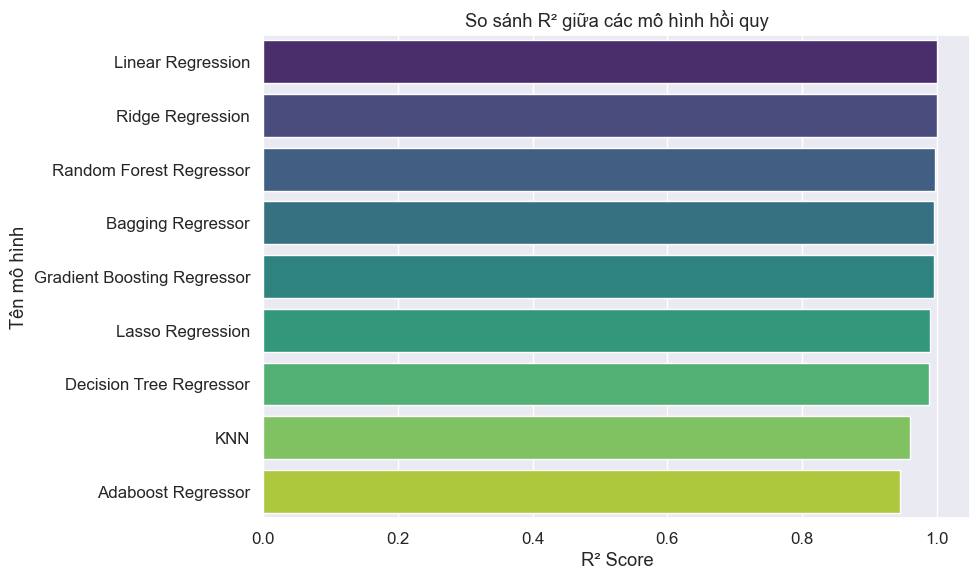

In [41]:
# 📊 Bảng tổng hợp kết quả
results1_df = pd.DataFrame(results1).sort_values(by='R2', ascending=False)
print("\n📋 Tổng hợp kết quả:")
print(results1_df)

# 📊 Vẽ biểu đồ so sánh R² các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(data=results1_df, x='R2', y='Model', palette='viridis')
plt.title('So sánh R² giữa các mô hình hồi quy')
plt.xlabel('R² Score')
plt.ylabel('Tên mô hình')
plt.tight_layout()
plt.show()

In [42]:
df_full = df.copy()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Chọn các cột số để phân cụm (ESG + Tài chính)
cols_to_cluster = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
                   'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
                   'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

X = df_full[cols_to_cluster].dropna()  # loại bỏ NaN nếu có

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Giảm chiều bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

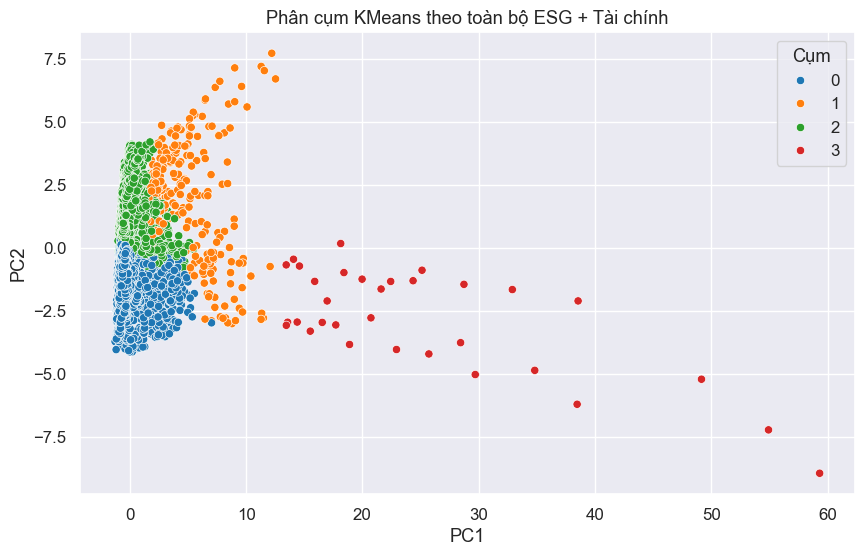

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Tạo dataframe cho visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# 6. Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Phân cụm KMeans theo toàn bộ ESG + Tài chính')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cụm')
plt.grid(True)

plt.show()

# TIME-SERIES PREDICTION

In [66]:
df_ts = df.copy()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [80]:
def forecast_ts(df_ts, industry, column, start_year=2015, split_year=2023, end_year=2028, save_result=False):
    """
    Dự báo chuỗi thời gian ARIMA cho một ngành và biến cụ thể.

    Parameters:
        df (DataFrame): Dữ liệu gốc
        industry (str): Tên ngành
        column (str): Biến mục tiêu cần dự báo
        start_year (int): Năm bắt đầu
        split_year (int): Năm tách train/test
        end_year (int): Năm kết thúc dự báo
        save_result (bool): Có lưu dự báo tương lai vào DataFrame không?
    """

    df_time = df_ts[df_ts['Industry'] == industry].groupby('Year')[[column]].mean()
    series = df_time[column]

    # Kiểm định ADF
    adf_result = adfuller(series)
    print(f"\n📊 [ADF Test] '{column}' for '{industry}': ADF={adf_result[0]:.4f}, p={adf_result[1]:.4f}")

    # Tách train/test
    train = series[series.index < split_year]
    test = series[series.index >= split_year]

    # Auto ARIMA
    arima_model = auto_arima(train, seasonal=True, m=1)
    order = arima_model.order
    model_fit = ARIMA(train, order=order).fit()

    # Dự báo đến end_year
    steps = end_year - split_year + 1
    forecast = model_fit.forecast(steps=steps)
    forecast_index = list(range(split_year, end_year + 1))
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Plot đầy đủ
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Actual', color='blue')
    plt.plot(forecast_index, forecast, label='Forecast (Future)', color='green', linestyle='--')
    plt.axvline(x=split_year - 0.5, color='gray', linestyle='dotted')
    plt.title(f"📈 ARIMA Forecast for '{column}' - {industry}")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Tính RMSE nếu có test
    if len(test) > 0 and len(test) == len(forecast[:len(test)]):
        rmse = mean_squared_error(test, forecast[:len(test)], squared=False)
        print(f"📉 RMSE (2023–2025): {rmse:.4f}")
    else:
        print("⚠️ Không có đủ test hoặc dự báo để tính RMSE.")

    # Trả về kết quả nếu cần
    if save_result:
        result_df = pd.DataFrame({
            'Year': forecast_index,
            'Forecasted_' + column: forecast
        })
        return result_df



📊 [ADF Test] 'ESG_Overall' for 'Finance': ADF=0.9214, p=0.9934


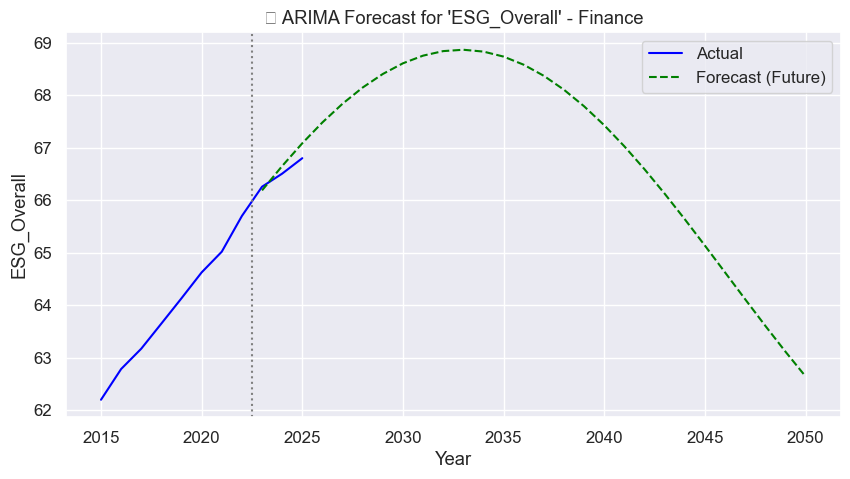

📉 RMSE (2023–2025): 0.1886
    Year  Forecasted_ESG_Overall
8   2023               66.186966
9   2024               66.651176
10  2025               67.085237
11  2026               67.483072
12  2027               67.839116
13  2028               68.148394
14  2029               68.406592
15  2030               68.610115
16  2031               68.756140
17  2032               68.842652
18  2033               68.868475
19  2034               68.833286
20  2035               68.737617
21  2036               68.582851
22  2037               68.371202
23  2038               68.105678
24  2039               67.790045
25  2040               67.428769
26  2041               67.026953
27  2042               66.590270
28  2043               66.124876
29  2044               65.637327
30  2045               65.134485
31  2046               64.623426
32  2047               64.111333
33  2048               63.605401
34  2049               63.112732
35  2050               62.640240


In [83]:
# Dự báo chỉ số tăng trưởng ngành Retail đến 2028 và lưu lại
forecast_df = forecast_ts(df, industry='Finance', column='ESG_Overall', end_year=2050, save_result=True)

# Xem kết quả dự báo
print(forecast_df)
